# Imports

In [ ]:
import numpy as np
import os, cv2, matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset

In [ ]:
X_train = np.load("/content/drive/MyDrive/DAT255_prosjekt/processed_data/X_train.npy")
X_test = np.load("/content/drive/MyDrive/DAT255_prosjekt/processed_data/X_test.npy")
y_train = np.load("/content/drive/MyDrive/DAT255_prosjekt/processed_data/y_train.npy")
y_test = np.load("/content/drive/MyDrive/DAT255_prosjekt/processed_data/y_test.npy")


In [ ]:
n_classes = 6

LABELS = [
    "JUMPING",
    "JUMPING_JACKS",
    "BOXING",
    "WAVING_2HANDS",
    "WAVING_1HAND",
    "CLAPPING_HANDS"
]

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=n_classes)
early_stop = EarlyStopping(monitor='loss', patience=2)

# GRU

In [ ]:
from tensorflow.keras.layers import GRU, Dropout, Dense

GRU_model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

GRU_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
GRU_model.summary()

history = GRU_model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 32, 128)        │        62,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,774 (409.27 KB)

 Trainable params: 104,774 (409.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.5023 - loss: 1.1558 - val_accuracy: 0.8742 - val_loss: 0.3247
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.8600 - loss: 0.3481 - val_accuracy: 0.8335 - val_loss: 0.4825
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9269 - loss: 0.1984 - val_accuracy: 0.9740 - val_loss: 0.0762
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9666 - loss: 0.0995 - val_accuracy: 0.9840 - val_loss: 0.0481
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9796 - loss: 0.0607 - val_accuracy: 0.9914 - val_loss: 0.0269
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9908 - val_loss: 0.0291
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9862 - loss: 0.0398 - val_accuracy: 0.9849 - val_loss: 0.0469
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9890 - lo

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


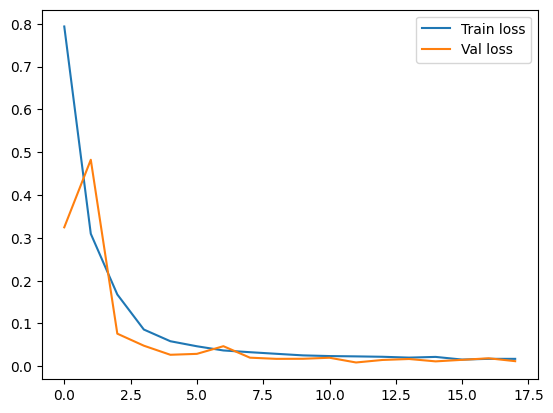

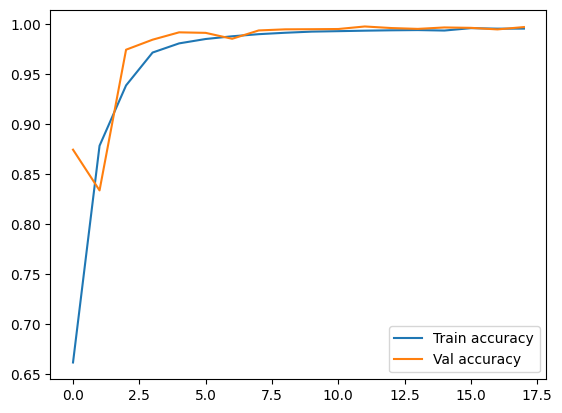

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

# Temporal CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Dropout, GlobalAveragePooling1D, Dense

# Temporal CNN model
TCNN_model = Sequential([
    Conv1D(64, kernel_size=3, dilation_rate=1, padding='causal', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    ReLU(),
    Dropout(0.2),

    Conv1D(128, kernel_size=3, dilation_rate=2, padding='causal'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.2),

    Conv1D(256, kernel_size=3, dilation_rate=4, padding='causal'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.2),

    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

TCNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
TCNN_model.summary()

history = TCNN_model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 32, 64)         │         6,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 32, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 32, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,486 (580.02 KB)

 Trainable params: 147,590 (576.52 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7805 - loss: 0.5460 - val_accuracy: 0.9521 - val_loss: 0.1216
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9673 - loss: 0.0873 - val_accuracy: 0.9571 - val_loss: 0.1137
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9810 - loss: 0.0541 - val_accuracy: 0.9216 - val_loss: 0.2433
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9846 - loss: 0.0462 - val_accuracy: 0.9662 - val_loss: 0.0934
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9882 - loss: 0.0352 - val_accuracy: 0.9739 - val_loss: 0.0770
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9893 - loss: 0.0317 - val_accuracy: 0.9727 - val_loss: 0.0753
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9854 - val_loss: 0.0424
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9917 - loss: 0.025

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


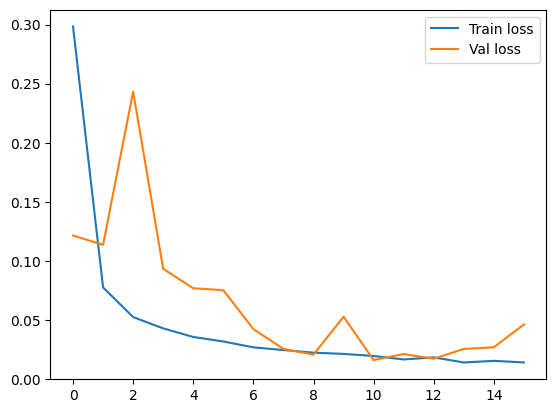

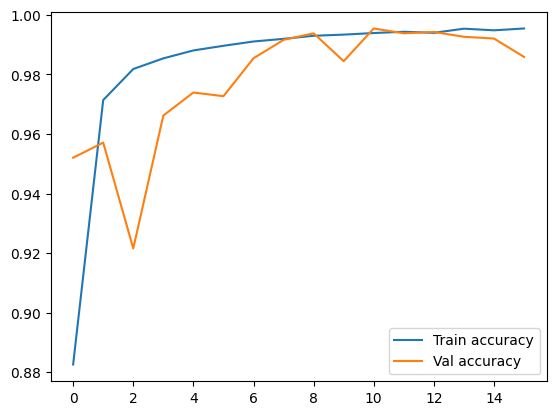

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

# Test accuracy

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9765258215962441
                precision    recall  f1-score   support

       JUMPING       0.99      1.00      1.00       676
 JUMPING_JACKS       0.99      0.92      0.95       783
        BOXING       0.99      0.96      0.97      1216
 WAVING_2HANDS       0.95      1.00      0.98      1320
  WAVING_1HAND       0.98      1.00      0.99      1313
CLAPPING_HANDS       0.96      0.97      0.96       443

      accuracy                           0.98      5751
     macro avg       0.98      0.97      0.97      5751
  weighted avg       0.98      0.98      0.98      5751



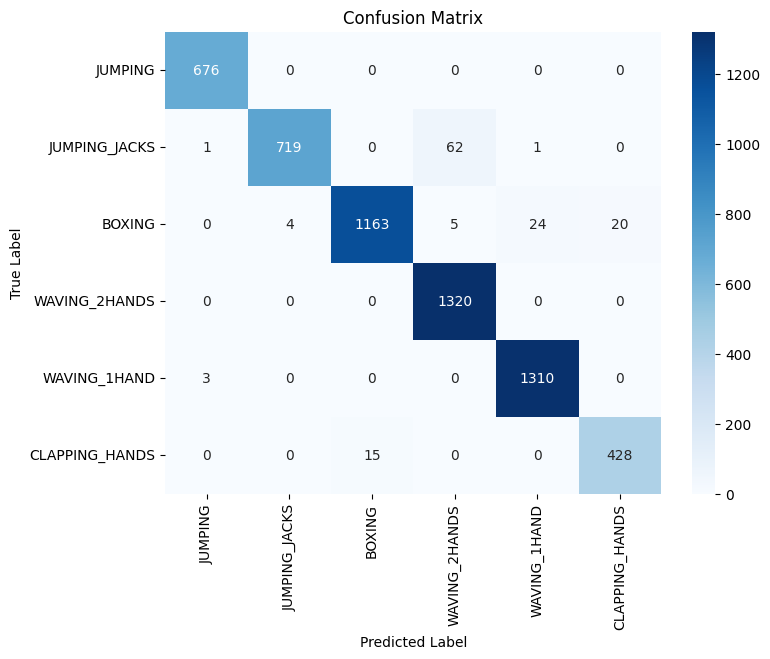

In [ ]:
y_pred = TCNN_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to class labels if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))

# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9942618675013041
                precision    recall  f1-score   support

       JUMPING       1.00      1.00      1.00       676
 JUMPING_JACKS       1.00      1.00      1.00       783
        BOXING       0.99      0.98      0.99      1216
 WAVING_2HANDS       1.00      1.00      1.00      1320
  WAVING_1HAND       1.00      1.00      1.00      1313
CLAPPING_HANDS       0.96      0.99      0.97       443

      accuracy                           0.99      5751
     macro avg       0.99      0.99      0.99      5751
  weighted avg       0.99      0.99      0.99      5751



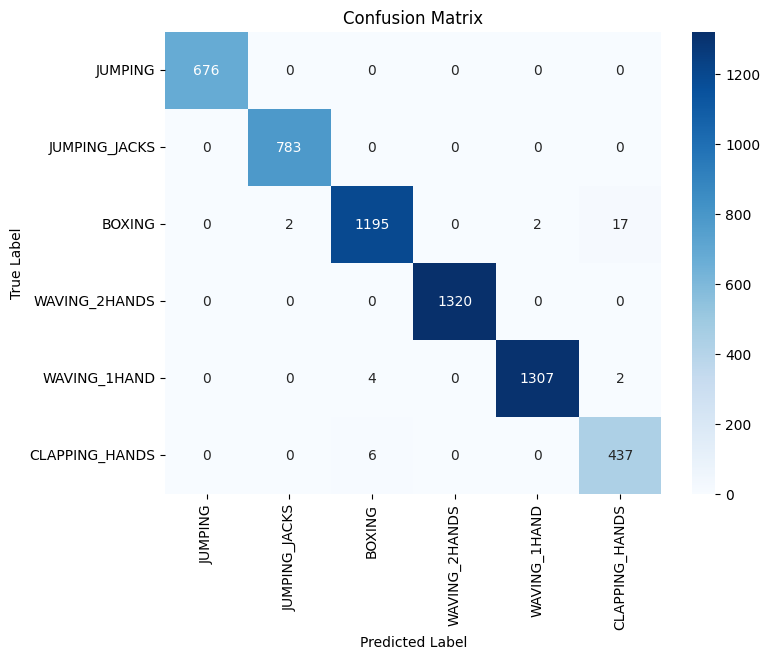

In [ ]:
y_pred = GRU_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to class labels if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))

# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()